<a href="https://colab.research.google.com/github/s4kh4rov/BMIL/blob/master/magdiplom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [156]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import glob
import os
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import imutils

In [157]:
def resizeImage(width, height, image):
  down_points = (width, height)
  return cv2.resize(image, down_points, interpolation= cv2.INTER_LINEAR)

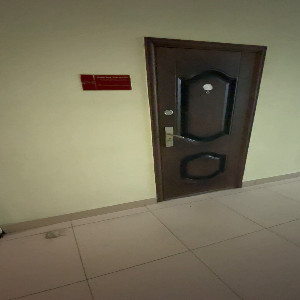

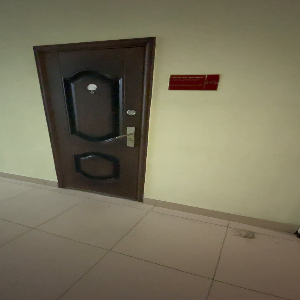

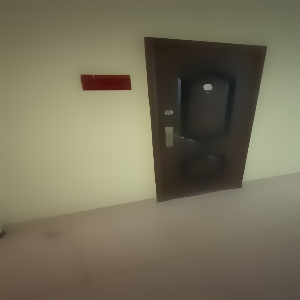

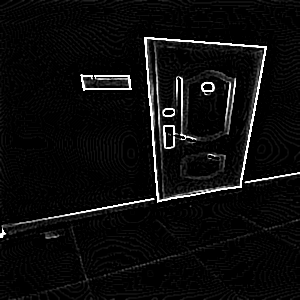

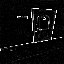

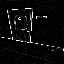

In [155]:
all_img_paths = glob.glob("/content/drive/MyDrive/diplom/photos/doors/*")
path = '/content/drive/MyDrive/diplom/readyImg/door/'
i=0
for img_path in all_img_paths:
  img = cv2.imread(img_path)
  img300 = resizeImage(300,300,img)
  imgEdge = cv2.edgePreservingFilter(img300, flags=1, sigma_s=10, sigma_r=0.9)
  imgGray = cv2.cvtColor(imgEdge, cv2.COLOR_BGR2GRAY)
  imgLap = cv2.Laplacian(imgGray, cv2.CV_64F, ksize=5)
  # img64 = imutils.resize(imgLap, width=64,height=64)
  # cv2_imshow(img64)
  cv2.imwrite(os.path.join(path , 'door'+str(i)+'.jpg'), imgLap)
  i+=1
  flip = cv2.flip(imgLap,1)
  cv2.imwrite(os.path.join(path , 'door'+str(i)+'.jpg'), flip)
  i+=1

# img_path = '/content/drive/MyDrive/diplom/photos/doors/IMG_1785_000.jpg'

# img = cv2.imread(img_path)
# img300 = resizeImage(300,300,img)
# cv2_imshow(img300)
# image = cv2.flip(img300,1)
# cv2_imshow(image)
# imgEdge = cv2.edgePreservingFilter(img300, flags=1, sigma_s=10, sigma_r=0.9)
# imgGray = cv2.cvtColor(imgEdge, cv2.COLOR_BGR2GRAY)
# cv2_imshow(imgEdge)
# imgLap = cv2.Laplacian(imgGray, cv2.CV_64F, ksize=5)
# cv2_imshow(imgLap)
# img64 = resizeImage(64,64,imgLap)
# cv2_imshow(img64)
# cv2_imshow(cv2.flip(img64,1))


# # img64 = resizeImage(64,64,imgLap)
# # cv2_imshow(img64)


# resized = imutils.resize(imgLap, width=64,height=64)
# cv2_imshow(resized)

In [87]:
DATADIR = "/content/drive/MyDrive/diplom/readyImg/"

LABELS = ["stair", "door"]

X_TRAIN = []
Y_TRAIN = []

IMG_SIZE = 64
for category in LABELS:
    path = os.path.join(DATADIR, category)
    class_num = LABELS.index(category)
    for img in os.listdir(path):
        try:
            img_array = cv2.imread(os.path.join(path, img),cv2.IMREAD_GRAYSCALE)
            new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            X_TRAIN.append(new_array)
            Y_TRAIN.append(class_num)
        except Exception as e:
            pass

X_TRAIN = np.array(X_TRAIN).reshape(-1, IMG_SIZE, IMG_SIZE,1)
Y_TRAIN = np.array(Y_TRAIN)
X_TRAIN = X_TRAIN/255

In [88]:
print(len(X_TRAIN))
print(len(Y_TRAIN))
#print(X_TRAIN)

778
778


In [89]:
model = models.Sequential()
# model.add(layers.Conv2D(32, (5, 5), activation='relu',padding='same' ,input_shape=(64, 64,3)))
model.add(layers.Conv2D(32, (5, 5), activation='relu',padding='same' ,input_shape=(64, 64,1)))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Activation("relu"))

model.add(layers.Conv2D(32, (5, 5), activation='relu',padding='same' ,input_shape=(32, 32,1)))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Activation("relu"))

model.add(layers.Conv2D(64, (5, 5), activation='relu',padding='same' ,input_shape=(16, 16,1)))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Activation("relu"))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(64))
model.add(layers.Dense(2))
model.add(layers.Activation("softmax"))

model.summary()

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 64, 64, 32)        832       
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 32, 32, 32)        0         
 ng2D)                                                           
                                                                 
 activation_20 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 conv2d_16 (Conv2D)          (None, 32, 32, 32)        25632     
                                                                 
 max_pooling2d_21 (MaxPooli  (None, 16, 16, 32)        0         
 ng2D)                                                           
                                                                 
 activation_21 (Activation)  (None, 16, 16, 32)       

In [90]:
history = model.fit(X_TRAIN,Y_TRAIN, epochs=3, validation_split=0.3)

Epoch 1/3
17/17 [==============================] - 9s 461ms/step - loss: 27.2837 - accuracy: 0.7463 - val_loss: 56.4946 - val_accuracy: 0.0000e+00
Epoch 2/3
17/17 [==============================] - 7s 405ms/step - loss: 2.7898 - accuracy: 0.8897 - val_loss: 9.4819 - val_accuracy: 0.0000e+00
Epoch 3/3
17/17 [==============================] - 6s 330ms/step - loss: 0.2780 - accuracy: 0.9118 - val_loss: 3.3048 - val_accuracy: 0.0171


1/1 [==============================] - 0s 134ms/step
[[9.9985635e-01 1.4361259e-04]
 [9.9943942e-01 5.6057743e-04]
 [9.9990451e-01 9.5476171e-05]]


IndexError: ignored

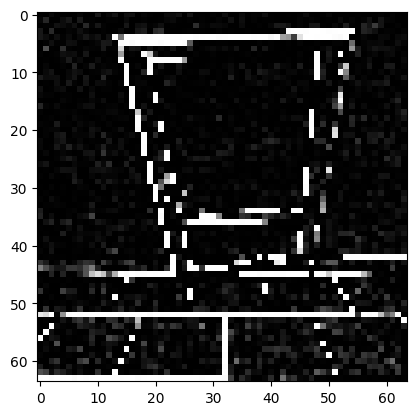

In [91]:
import matplotlib.pyplot as plt
TESTDIR = "/content/drive/MyDrive/diplom/test/door286.jpg"
# for img in os.listdir(TESTDIR):
#     try:
#         img_array = cv2.imread(os.path.join(TESTDIR, img))
#         new_img = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
#         new_shape = new_img.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
#         predictions = model.predict(new_shape)
#         # plt.imshow(new_img)
#         # print(predictions)
#         print(LABELS[np.argmax(predictions)])
#     except Exception as e:
#         pass
img_array = cv2.imread(TESTDIR)
new_img = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
new_shape = new_img.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
predictions = model.predict(new_shape)
plt.imshow(new_img)
print(predictions)
print(LABELS[np.argmax(predictions)])